# ⚡ Level 10 — Learning Rate Schedules (Static Visualization)

> **Objective:**  
> Understand how different learning-rate scheduling strategies —  
> **Constant**, **Step Decay**, **Exponential Decay**, and **Cyclical (Triangular)** —  
> influence gradient descent convergence on a convex surface.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simple convex bowl-shaped loss surface
def f(x, y): 
    return 0.5 * (x**2 + 2*y**2)

def grad(x, y):
    return np.array([x, 2*y])


In [2]:
def constant_lr(t, base_lr=0.1):
    return base_lr

def step_decay_lr(t, base_lr=0.1, drop=0.5, step_size=20):
    return base_lr * (drop ** (t // step_size))

def exp_decay_lr(t, base_lr=0.1, decay=0.05):
    return base_lr * np.exp(-decay * t)

def cyclical_lr(t, base_lr=0.01, max_lr=0.1, step_size=15):
    cycle = np.floor(1 + t / (2 * step_size))
    x = np.abs(t / step_size - 2 * cycle + 1)
    return base_lr + (max_lr - base_lr) * max(0, (1 - x))


In [3]:
def run_gd(lr_schedule, steps=80, base_lr=0.1):
    x, y = 2.5, 2.5
    path = [(x, y, f(x, y))]
    for t in range(steps):
        lr = lr_schedule(t)
        g = grad(x, y)
        x -= lr * g[0]
        y -= lr * g[1]
        path.append((x, y, f(x, y)))
    return np.array(path)

paths = {
    "Constant": run_gd(lambda t: constant_lr(t, 0.08)),
    "Step Decay": run_gd(lambda t: step_decay_lr(t, 0.08, drop=0.5, step_size=20)),
    "Exponential": run_gd(lambda t: exp_decay_lr(t, 0.08, decay=0.05)),
    "Cyclical": run_gd(lambda t: cyclical_lr(t, 0.01, 0.08, 15)),
}


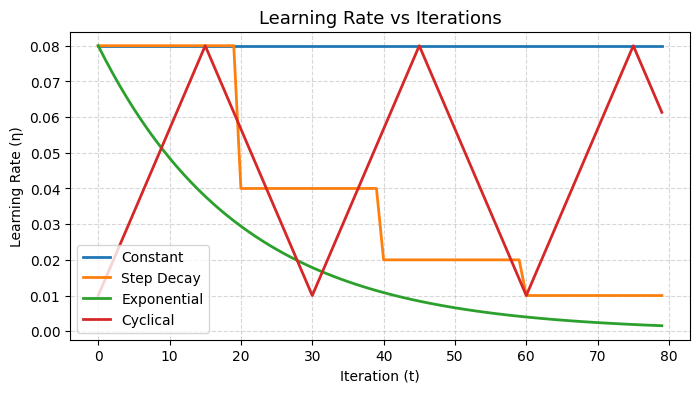

In [4]:
t = np.arange(80)

plt.figure(figsize=(8, 4))
plt.plot(t, [constant_lr(i, 0.08) for i in t], label="Constant", lw=2)
plt.plot(t, [step_decay_lr(i, 0.08) for i in t], label="Step Decay", lw=2)
plt.plot(t, [exp_decay_lr(i, 0.08) for i in t], label="Exponential", lw=2)
plt.plot(t, [cyclical_lr(i, 0.01, 0.08, 15) for i in t], label="Cyclical", lw=2)

plt.title("Learning Rate vs Iterations", fontsize=13)
plt.xlabel("Iteration (t)")
plt.ylabel("Learning Rate (η)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


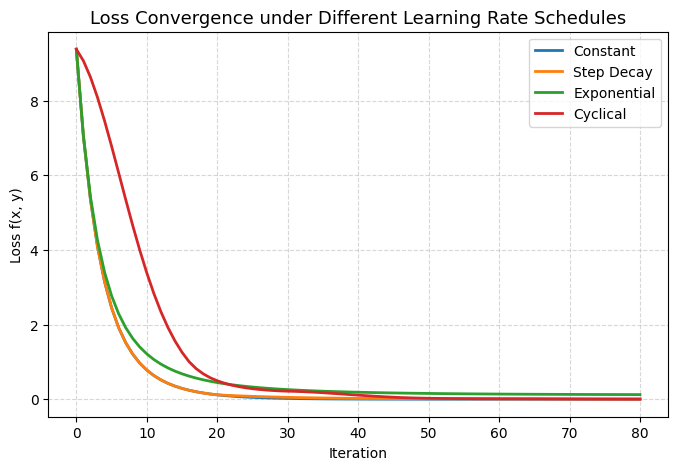

In [5]:
plt.figure(figsize=(8, 5))

for name, path in paths.items():
    plt.plot(path[:, 2], label=name, lw=2)

plt.title("Loss Convergence under Different Learning Rate Schedules", fontsize=13)
plt.xlabel("Iteration")
plt.ylabel("Loss f(x, y)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


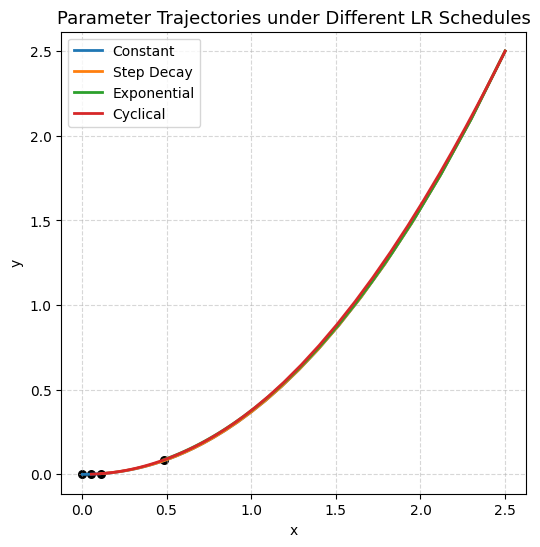

In [6]:
plt.figure(figsize=(6, 6))
for name, path in paths.items():
    plt.plot(path[:, 0], path[:, 1], label=name, lw=2)
    plt.scatter(path[-1, 0], path[-1, 1], marker="o", color="black", s=30)
plt.title("Parameter Trajectories under Different LR Schedules", fontsize=13)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.axis("equal")
plt.show()


## 🧠 Mathematical Insight

### Constant Learning Rate
$$
\eta_t = \eta_0
$$
A fixed step size — simple but often unstable.

---

### Step Decay
$$
\eta_t = \eta_0 \times \text{drop}^{\lfloor t / s \rfloor}
$$
Learning rate drops by a constant factor every few epochs.  
Stabilizes convergence but may cause abrupt transitions.

---

### Exponential Decay
$$
\eta_t = \eta_0 e^{-\lambda t}
$$
Smooth, gradual decay — useful for long training cycles.  
Provides continuous adjustment without sudden shocks.

---

### Cyclical (Triangular)
$$
\eta_t = \eta_{\min} + (\eta_{\max} - \eta_{\min}) \max(0, 1 - |x|)
$$
The learning rate oscillates between two bounds,  
encouraging exploration early and fine-tuning later —  
a technique inspired by **energy modulation** in physics and **annealing** in optimization.

---

**Interpretation:**  
The learning rate (η) behaves like *temperature* in an annealing process:
- High η → exploration  
- Low η → exploitation  

Modern optimizers (AdamW, SGD with momentum) perform best with *dynamic learning rate control* rather than a fixed schedule.


## 🧩 Observations

| Schedule | Strength | Weakness | Ideal Scenario |
|-----------|-----------|-----------|----------------|
| **Constant** | Fast early convergence | Unstable, may diverge | Small problems, low noise |
| **Step Decay** | Sudden precision boost | Abrupt shifts | Classic ML setups |
| **Exponential** | Smooth control | Can decay too early | Long steady training |
| **Cyclical** | Escapes local minima | Slight oscillation | Deep learning (CNNs, NLP) |


## 🧭 Takeaway

- The **learning rate schedule** is the *control system* of optimization.
- It determines how energy (gradient step) is allocated through time.
- **Static LR** = simple but brittle.  
- **Dynamic LR** = adaptive, robust, generalizable.

> The best modern strategies combine *AdamW + Cyclical / Cosine Decay*  
> — this is what powers stable, efficient training in real-world models like **ResNet**, **ViT**, and **Transformers**.
